In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import matplotlib.pyplot as plt
%matplotlib inline


print('Libraries imported.')

Libraries imported.


#### Reading venue data stored on Git into city_venues

In [193]:
city_venues=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/Mumbai_venues.csv")
city_venues.drop(['Unnamed: 0'],axis=1,inplace=True)

print(city_venues.shape)
city_venues.head()

(11328, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,19.156129,72.870722,Aarey Garden Restaurant,19.155514,72.878236,Indian Restaurant
1,Aarey Milk Colony,19.156129,72.870722,Panchvati Fast Food Corner,19.157628,72.874506,Fast Food Restaurant
2,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir Boating,19.160905,72.872482,Lake
3,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir,19.163542,72.873487,Monument / Landmark
4,Abhyudaya Nagar,18.990477,72.844057,Ladu Samrat,18.994526,72.836574,Indian Restaurant


### there are about 236 venue_types in the file. A lot of them are overlapping and similar. for the purpose of analysis, we have reduced the venue types to 14 and the existing venue types are mapped to the new venue types intended at understanding the type of locality

In [194]:
venue_map=pd.read_csv('https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/venue_category_mapping.csv',encoding='latin-1')
venue_map['Venue Mapping'].unique()

array(['regular_restaurants', 'nature_view', 'tourist_interest',
       'shopping', 'transport_vicinity', 'business_hub',
       'stores_daily_conveniences', 'sports_fitness', 'café_fastfoods',
       'cuisine_restaurants', 'arts_culture_recreation', 'bars_nightlife',
       'kids_family_residential', 'education_colleges'], dtype=object)

### Merging the mapped venues wiuth the exoisting venue categories

In [195]:
city_venue=pd.merge(city_venues,venue_map,on='Venue Category',how='left')
city_venue.head().sort_values('Neighborhood',ascending=True)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Mapping
0,Aarey Milk Colony,19.156129,72.870722,Aarey Garden Restaurant,19.155514,72.878236,Indian Restaurant,regular_restaurants
1,Aarey Milk Colony,19.156129,72.870722,Panchvati Fast Food Corner,19.157628,72.874506,Fast Food Restaurant,regular_restaurants
2,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir Boating,19.160905,72.872482,Lake,nature_view
3,Aarey Milk Colony,19.156129,72.870722,Chota Kashmir,19.163542,72.873487,Monument / Landmark,tourist_interest
4,Abhyudaya Nagar,18.990477,72.844057,Ladu Samrat,18.994526,72.836574,Indian Restaurant,regular_restaurants


In [ ]:
## Applying one hot encoding to the venue mapping column

In [196]:
city_onehot = pd.get_dummies(city_venue[['Venue Mapping']], prefix="", prefix_sep="")
#print(Toronto_onehot.head())
# add neighborhood column back to dataframe
city_onehot['Neighborhood'] = city_venue['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head().sort_values('Neighborhood',ascending=True)

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,café_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Aarey Milk Colony,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Aarey Milk Colony,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Aarey Milk Colony,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Abhyudaya Nagar,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [338]:
## Grouping Neighborhoods by the sum of the venue_types

In [269]:
city_grouped = city_onehot.groupby('Neighborhood').mean().reset_index()
city_grouped

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,café_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,Aarey Milk Colony,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.250000,0.000000
1,Abhyudaya Nagar,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.142857,0.142857,0.000000,0.142857
2,Airoli,0.000000,0.000000,0.000000,0.166667,0.083333,0.000000,0.000000,0.000000,0.500000,0.000000,0.083333,0.083333,0.000000,0.083333
3,Alika Nagar,0.090909,0.000000,0.000000,0.545455,0.000000,0.000000,0.000000,0.000000,0.181818,0.090909,0.000000,0.090909,0.000000,0.000000
4,Ambedkar Nagar,0.030000,0.140000,0.000000,0.240000,0.170000,0.000000,0.000000,0.020000,0.210000,0.010000,0.050000,0.080000,0.000000,0.010000
5,Amboli,0.055556,0.000000,0.000000,0.166667,0.000000,0.000000,0.055556,0.000000,0.444444,0.000000,0.166667,0.111111,0.000000,0.000000
6,Amrut Nagar,0.018868,0.132075,0.000000,0.094340,0.075472,0.000000,0.018868,0.000000,0.320755,0.018868,0.075472,0.132075,0.000000,0.000000
7,Anand Nagar,0.026316,0.052632,0.000000,0.263158,0.026316,0.000000,0.013158,0.013158,0.197368,0.000000,0.052632,0.197368,0.039474,0.065789
8,Andheri (East),0.021739,0.043478,0.000000,0.152174,0.021739,0.000000,0.000000,0.021739,0.456522,0.043478,0.000000,0.108696,0.043478,0.043478
9,Andheri (West),0.116667,0.083333,0.000000,0.183333,0.016667,0.000000,0.016667,0.000000,0.250000,0.000000,0.066667,0.150000,0.016667,0.000000


In [270]:
# normalizing data  


#for k in range(1,15):
#    city_grouped[city_grouped.columns[k]]=(city_grouped[city_grouped.columns[k]]/city_grouped[city_grouped.columns[k]].max())
city_grouped.head()

,Neighborhood,arts_culture_recreation,bars_nightlife,business_hub,café_fastfoods,cuisine_restaurants,education_colleges,kids_family_residential,nature_view,regular_restaurants,shopping,sports_fitness,stores_daily_conveniences,tourist_interest,transport_vicinity
0,Aarey Milk Colony,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.25,0.500000,0.000000,0.000000,0.000000,0.25,0.000000
1,Abhyudaya Nagar,0.000000,0.00,0.142857,0.000000,0.000000,0.0,0.0,0.00,0.285714,0.142857,0.142857,0.142857,0.00,0.142857
2,Airoli,0.000000,0.00,0.000000,0.166667,0.083333,0.0,0.0,0.00,0.500000,0.000000,0.083333,0.083333,0.00,0.083333
3,Alika Nagar,0.090909,0.00,0.000000,0.545455,0.000000,0.0,0.0,0.00,0.181818,0.090909,0.000000,0.090909,0.00,0.000000
4,Ambedkar Nagar,0.030000,0.14,0.000000,0.240000,0.170000,0.0,0.0,0.02,0.210000,0.010000,0.050000,0.080000,0.00,0.010000


In [341]:
## function to return the top venues per neighborhood

In [256]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [271]:
num_top_venues = 14

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = city_grouped['Neighborhood']

for ind in np.arange(city_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue
0,Aarey Milk Colony,regular_restaurants,tourist_interest,nature_view,transport_vicinity,stores_daily_conveniences,sports_fitness,shopping,kids_family_residential,education_colleges,cuisine_restaurants,café_fastfoods,business_hub,bars_nightlife,arts_culture_recreation
1,Abhyudaya Nagar,regular_restaurants,transport_vicinity,stores_daily_conveniences,sports_fitness,shopping,business_hub,tourist_interest,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,café_fastfoods,bars_nightlife,arts_culture_recreation
2,Airoli,regular_restaurants,café_fastfoods,transport_vicinity,stores_daily_conveniences,sports_fitness,cuisine_restaurants,tourist_interest,shopping,nature_view,kids_family_residential,education_colleges,business_hub,bars_nightlife,arts_culture_recreation
3,Alika Nagar,café_fastfoods,regular_restaurants,stores_daily_conveniences,shopping,arts_culture_recreation,transport_vicinity,tourist_interest,sports_fitness,nature_view,kids_family_residential,education_colleges,cuisine_restaurants,business_hub,bars_nightlife
4,Ambedkar Nagar,café_fastfoods,regular_restaurants,cuisine_restaurants,bars_nightlife,stores_daily_conveniences,sports_fitness,arts_culture_recreation,nature_view,transport_vicinity,shopping,tourist_interest,kids_family_residential,education_colleges,business_hub


In [272]:
# dropping stores regular restaurants and cafes as they are quite abundant and available in each areas

city_grouped_clustering = city_grouped.drop(['Neighborhood'], 1)

distance=[]

kclusters= range(1,20)
for k in kclusters:
# run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(city_grouped_clustering)
    distance.append(kmeans.inertia_)

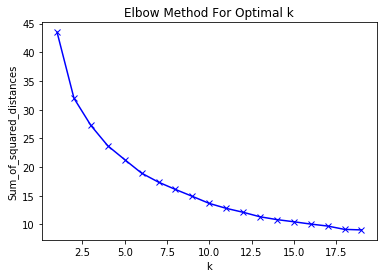

In [273]:
# Checking the elbow to find th emost desirable K-value

plt.plot(kclusters,distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [274]:
# selecting the number of clusters as 10

kclusters = 10


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)
 
#neighborhoods_venues_sorted.drop(['Cluster Labels'],axis=1,inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [285]:
# defining the final city data with cluster
city_final = city_venue

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
city_final = city_venue.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# 
city_plot=city_final[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Cluster Labels']].groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude'],as_index=False).mean()
city_plot.sort_values('Cluster Labels')

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels
182,Prabhadevi,19.014881,72.827956,0
156,Mumbai Central,18.970174,72.819213,0
160,Natwar Nagar,19.130319,72.850569,0
164,Nerul,19.033612,73.018140,0
168,Orlem,19.194482,72.838966,0
172,Palm Beach,19.008300,73.023019,0
173,Pant Nagar,19.086912,72.915615,0
177,Pendse Nagar,19.165626,72.852589,0
154,Mulund (West),19.171972,72.951196,0
178,Pestom Sagar Colony,19.069254,72.901923,0


In [356]:
## Checking the distribution of the clusters

In [276]:
clusters=city_plot[['Neighborhood','Cluster Labels']].groupby(['Cluster Labels'],as_index=False).count().sort_values('Neighborhood',ascending=False)
clusters.sort_values('Cluster Labels')

,Cluster Labels,Neighborhood
0,0,117
1,1,11
2,2,39
3,3,12
4,4,32
5,5,39
6,6,6
7,7,81
8,8,17
9,9,12


In [358]:
# Checking the most common venue for each clusters

In [277]:

cluster_label_1=city_final[['Cluster Labels','1st Most Common Venue','Neighborhood']].groupby(['Cluster Labels','1st Most Common Venue'],as_index=False).count().sort_values(['Cluster Labels','Neighborhood'],ascending=False)

cluster_label_1.rename(columns={'1st Most Common Venue':'Common Venue'},inplace=True)
cluster_label_1.head()

,Cluster Labels,Common Venue,Neighborhood
21,9,transport_vicinity,55
20,8,café_fastfoods,68
18,7,regular_restaurants,3832
16,7,café_fastfoods,423
15,7,bars_nightlife,246


In [278]:
cluster_label_2=city_final[['Cluster Labels','2nd Most Common Venue','Neighborhood']].groupby(['Cluster Labels','2nd Most Common Venue'],as_index=False).count().sort_values(['Cluster Labels','Neighborhood'],ascending=False)
cluster_label_2.rename(columns={'2nd Most Common Venue':'Common Venue'},inplace=True)
cluster_label_2.head()

,Cluster Labels,Common Venue,Neighborhood
45,9,stores_daily_conveniences,27
44,9,sports_fitness,13
46,9,tourist_interest,9
43,9,regular_restaurants,6
42,8,kids_family_residential,68


In [280]:
cluster_label_3=city_final[['Cluster Labels','3rd Most Common Venue','Neighborhood']].groupby(['Cluster Labels','3rd Most Common Venue'],as_index=False).count().sort_values(['Cluster Labels','Neighborhood'],ascending=False)
cluster_label_3.rename(columns={'3rd Most Common Venue':'Common Venue'},inplace=True)
cluster_label_3.head()

,Cluster Labels,Common Venue,Neighborhood
54,9,sports_fitness,17
52,9,nature_view,16
53,9,regular_restaurants,9
55,9,stores_daily_conveniences,5
50,9,arts_culture_recreation,4


In [281]:
cluster_label=pd.concat([cluster_label_1,cluster_label_2,cluster_label_3])
cluster_label=cluster_label.groupby(['Cluster Labels','Common Venue'],as_index=False).sum()
cluster_label

,Cluster Labels,Common Venue,Neighborhood
0,0,arts_culture_recreation,187
1,0,bars_nightlife,361
2,0,café_fastfoods,3541
3,0,cuisine_restaurants,156
4,0,education_colleges,11
5,0,nature_view,77
6,0,regular_restaurants,4030
7,0,shopping,17
8,0,sports_fitness,529
9,0,stores_daily_conveniences,2786


width: 0.05


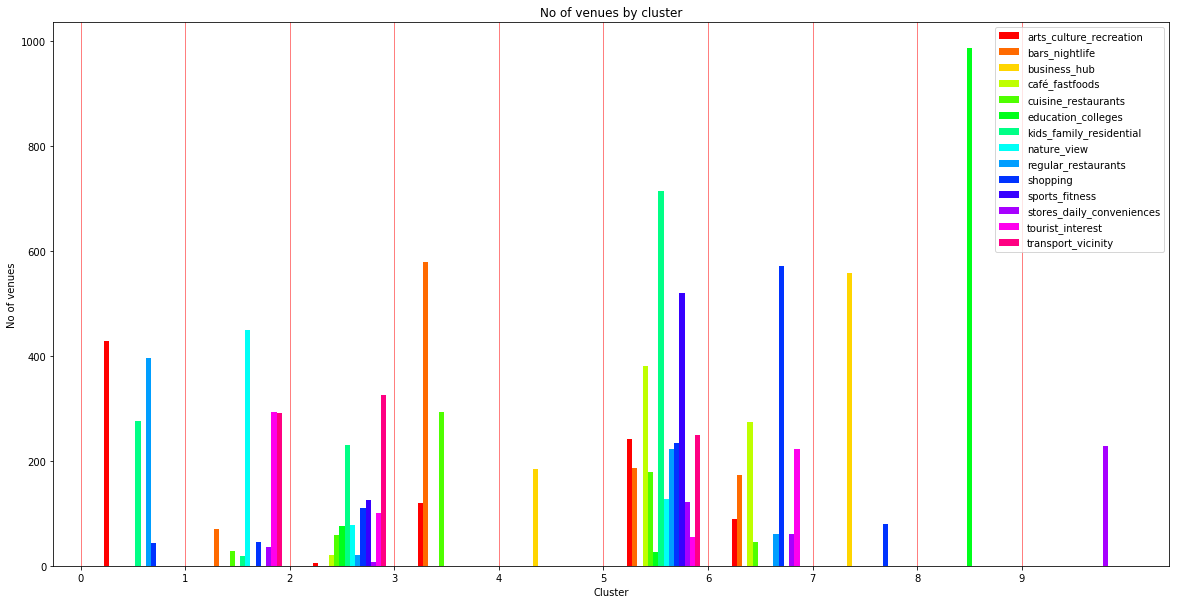

In [282]:
cluster_label_array= cluster_label_.values
fig = plt.figure(figsize=(20,10)) 
ax = plt.subplot()

space = .5

conditions = np.unique(cluster_label_array[:,0])
categories = np.unique(cluster_label_array[:,1])
#print(conditions)
#print(categories)
n = len(conditions)

width = (1 - space) / (len(conditions))
print ("width:", width)

for i,cat in enumerate(categories):
    vals=[0]*10
    val = cluster_label_array[cluster_label_array[:,1] == cat][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width-.5 for j in range(1,n+1)]
    num=cluster_label_array[cluster_label_array[:,1] == cat][:,0]
    for k in range(0,len(num)):
        vals[num[k]]=val[k]
    ax.bar(pos,vals, width=width,label=cat,color=cm.hsv(float(i) / len(categories)))

xticks=np.arange(n)

xticks1=[",".join(item) for item in xticks.astype(str)]

ax.set_xticks(xticks)
ax.set_xlabel('Cluster')
ax.set_ylabel('No of venues')
ax.set_title('No of venues by cluster')
ax.grid(linestyle='-', linewidth='0.5',axis='x', color='red')
ax.legend()

In [219]:
data={0:'Tourist Spots in vicinity',
      1:'Good for Family and kids',
      2:'Education Hub',
      3:'Prime Location',
      4:'Good for Sports_fitness Enthusiast',
      5:'Business Hub',
      6:'Hip and Happening',
      7:'Daily_conveniences',
      8:'arts_culture_recreation',
      9:'nature/sea_view',}

cluster_label_name= pd.Series(data).to_frame(name='label')
cluster_label_name


,label
0,Tourist Spots in vicinity
1,Good for Family and kids
2,Education Hub
3,Prime Location
4,Good for Sports_fitness Enthusiast
5,Business Hub
6,Hip and Happening
7,Daily_conveniences
8,arts_culture_recreation
9,nature/sea_view


In [220]:
# create map
latitude = city_plot['Neighborhood Latitude'].mean()
longitude = city_plot['Neighborhood Longitude'].mean()


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)

ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.tab10(np.linspace(0, 1, len(ys)))

col_scale = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_plot['Neighborhood Latitude'], city_plot['Neighborhood Longitude'], city_plot['Neighborhood'], city_plot['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7.5,
        popup=label,
        color=None,
        fill=True,
        fill_color=col_scale[cluster],
        fill_opacity=.8).add_to(map_clusters)

# Creating legend
for c in range(0,len(colors_array)):
    r=int(colors_array[c][0]*255)
    g=int(colors_array[c][1]*255)
    b=int(colors_array[c][2]*255)
    group =folium.FeatureGroup(name='<span style=\\"color:rgb({},{},{},{});\\">{}</span>'.format(r,g,b,1,str(c)+"-"+cluster_label_name.iloc[c]['label']))
    group.add_to(map_clusters)


folium.map.LayerControl('topright', collapsed=False).add_to(map_clusters)



map_clusters.save(outfile="clusters.html")

In [36]:
city_final[['Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']].drop_duplicates().sort_values('Cluster Labels')

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1307,0,tourist_interest,regular_restaurants,shopping,arts_culture_recreation,stores_daily_conveniences
3497,0,tourist_interest,regular_restaurants,bars_nightlife,arts_culture_recreation,cuisine_restaurants
3946,0,tourist_interest,bars_nightlife,kids_family_residential,arts_culture_recreation,stores_daily_conveniences
10957,0,tourist_interest,café_fastfoods,regular_restaurants,bars_nightlife,stores_daily_conveniences
7800,0,transport_vicinity,tourist_interest,regular_restaurants,bars_nightlife,café_fastfoods
1751,0,tourist_interest,cuisine_restaurants,shopping,café_fastfoods,sports_fitness
8448,0,tourist_interest,nature_view,sports_fitness,kids_family_residential,bars_nightlife
9139,0,tourist_interest,transport_vicinity,stores_daily_conveniences,education_colleges,cuisine_restaurants
1370,1,kids_family_residential,nature_view,arts_culture_recreation,tourist_interest,transport_vicinity
1389,1,kids_family_residential,shopping,stores_daily_conveniences,sports_fitness,education_colleges


In [37]:
(city_final[['Cluster Labels','1st Most Common Venue','Neighborhood']].groupby(['Cluster Labels','1st Most Common Venue'],as_index=False).count()).groupby(['Cluster Labels','1st Most Common Venue'],as_index=False).max()

,Cluster Labels,1st Most Common Venue,Neighborhood
0,0,tourist_interest,453
1,0,transport_vicinity,85
2,1,café_fastfoods,84
3,1,kids_family_residential,946
4,1,sports_fitness,32
5,1,stores_daily_conveniences,39
6,1,transport_vicinity,87
7,2,education_colleges,1014
8,3,arts_culture_recreation,242
9,3,bars_nightlife,60
